In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection

# Load the Data

In [2]:
file_name = 'stock.csv'
data = pd.read_csv(file_name,encoding = "ISO-8859-1")

In [3]:
data.head()

Date  Open Price  Close Price  High Price  Low Price      Volume
0  2-Jan-09      902.99       931.80      934.73     899.35  4048270080
1  5-Jan-09      929.17       927.45      936.63     919.53  5413910016
2  6-Jan-09      931.17       934.70      943.85     927.28  5392620032
3  7-Jan-09      927.45       906.65      927.45     902.37  4704940032
4  8-Jan-09      905.73       909.73      910.00     896.81  4991549952

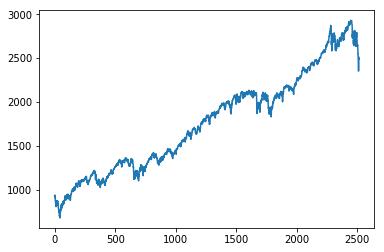

In [4]:
close_price = data['Close Price']
close_price.plot()

# Prepare the Data

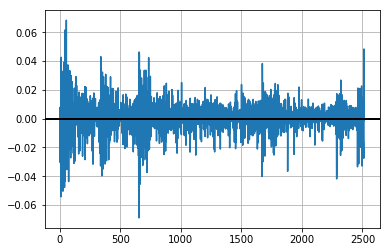

In [8]:
close = data['Close Price']
data['log_change'] = np.log(close) - np.log(close.shift(1))
log_change.plot(grid=True).axhline(y=0, color='black', lw=2)

In [12]:
def mapping(x):
    if x>0:
        return 1
    else:
        return 0
data['price_change']=data['log_change'].apply(mapping)
data

Date  Open Price  Close Price  High Price  Low Price      Volume  \
0      2-Jan-09      902.99       931.80      934.73     899.35  4048270080   
1      5-Jan-09      929.17       927.45      936.63     919.53  5413910016   
2      6-Jan-09      931.17       934.70      943.85     927.28  5392620032   
3      7-Jan-09      927.45       906.65      927.45     902.37  4704940032   
4      8-Jan-09      905.73       909.73      910.00     896.81  4991549952   
5      9-Jan-09      909.91       890.35      911.93     888.31  4716499968   
6     12-Jan-09      890.40       870.26      890.40     864.32  4725049856   
7     13-Jan-09      869.79       871.79      877.02     862.02  5017469952   
8     14-Jan-09      867.28       842.62      867.28     836.93  5407880192   
9     15-Jan-09      841.99       843.74      851.59     817.04  7807350272   
10    16-Jan-09      844.45       850.12      858.13     830.66  6786039808   
11    20-Jan-09      849.64       805.22      849.64     804.47  6375229952   
12    21-Jan-09      806.77       840.24      841.72     804.30  6467829760   
13    22-Jan-09      839.74       827.50      839.74     811.29  5843829760   
14    23-Jan-09      822.16       831.95      838.61     806.07  5832160256   
15    26-Jan-09      832.50       836.57      852.53     827.69  6039940096   
16    27-Jan-09      837.30       845.71      850.45     835.40  5353260032   
17    28-Jan-09      845.73       874.09      877.86     845.73  6199179776   
18    29-Jan-09      868.89       845.14      868.89     844.15  5067060224   
19    30-Jan-09      845.69       825.88      851.66     821.67  5350580224   
20     2-Feb-09      823.09       825.44      830.78     812.87  5673269760   
21     3-Feb-09      825.69       838.51      842.60     821.98  5886309888   
22     4-Feb-09      837.77       832.23      851.85     829.18  6420449792   
23     5-Feb-09      831.75       845.85      850.55     819.91  6624030208   
24     6-Feb-09      846.09       868.60      870.75     845.42  6484100096   
25     9-Feb-09      868.24       869.89      875.01     861.65  5574369792   
26    10-Feb-09      866.87       827.16      868.05     822.99  6770169856   
27    11-Feb-09      827.41       833.74      838.22     822.30  5926459904   
28    12-Feb-09      829.91       835.19      835.48     808.06  6476460032   
29    13-Feb-09      833.95       826.84      839.43     825.21  5296650240   
...         ...         ...          ...         ...        ...         ...   
2486  16-Nov-18     2718.54      2736.27     2746.75    2712.16  2517208064   
2487  19-Nov-18     2730.74      2690.73     2733.16    2681.09  2373464064   
2488  20-Nov-18     2654.60      2641.89     2669.44    2631.52  2753816832   
2489  21-Nov-18     2657.74      2649.93     2670.73    2649.82  1943396480   
2490  23-Nov-18     2633.36      2632.56     2647.55    2631.09   951652288   
2491  26-Nov-18     2649.97      2673.45     2674.35    2649.97  2113390208   
2492  27-Nov-18     2663.75      2682.17     2682.53    2655.89  2049665664   
2493  28-Nov-18     2691.45      2743.79     2744.00    2684.38  2308330240   
2494  29-Nov-18     2736.97      2737.76     2753.75    2722.94  1976804224   
2495  30-Nov-18     2737.76      2760.17     2760.88    2732.76  2831860736   
2496   3-Dec-18     2790.50      2790.37     2800.18    2773.38  2549100288   
2497   4-Dec-18     2782.43      2700.06     2785.93    2697.18  2813910016   
2498   5-Dec-18     2782.43      2700.06     2785.93    2697.18  2858957824   
2499   6-Dec-18     2663.51      2695.95     2696.15    2621.53  3115363584   
2500   7-Dec-18     2691.26      2633.08     2708.54    2623.14  2457232384   
2501  10-Dec-18     2630.86      2637.72     2647.51    2583.23  2434630656   
2502  11-Dec-18     2664.44      2636.78     2674.35    2621.30  2242852864   
2503  12-Dec-18     2658.23      2651.07     2685.44    2650.26  2304548096   
2504  13-Dec-18     2658.70      2650.54     2670.19    2637.

轉換成datetime

In [13]:
data['Date']=pd.to_datetime(data['Date'])
print(data.dtypes)

Date            datetime64[ns]
Open Price             float64
Close Price            float64
High Price             float64
Low Price              float64
Volume                   int64
log_change             float64
price_change             int64
dtype: object


將index轉為時間

In [14]:
data=data.set_index(data['Date'],drop=True)
del data['Date']
data.head()

Open Price  Close Price  High Price  Low Price      Volume  \
Date                                                                     
2009-01-02      902.99       931.80      934.73     899.35  4048270080   
2009-01-05      929.17       927.45      936.63     919.53  5413910016   
2009-01-06      931.17       934.70      943.85     927.28  5392620032   
2009-01-07      927.45       906.65      927.45     902.37  4704940032   
2009-01-08      905.73       909.73      910.00     896.81  4991549952   

            log_change  price_change  
Date                                  
2009-01-02         NaN             0  
2009-01-05   -0.004679             0  
2009-01-06    0.007787             1  
2009-01-07   -0.030469             0  
2009-01-08    0.003391             1

In [15]:
data.index=pd.to_datetime(data.index,format='%Y-%m-%d')#將index轉為時間datetime
data.head()

Open Price  Close Price  High Price  Low Price      Volume  \
Date                                                                     
2009-01-02      902.99       931.80      934.73     899.35  4048270080   
2009-01-05      929.17       927.45      936.63     919.53  5413910016   
2009-01-06      931.17       934.70      943.85     927.28  5392620032   
2009-01-07      927.45       906.65      927.45     902.37  4704940032   
2009-01-08      905.73       909.73      910.00     896.81  4991549952   

            log_change  price_change  
Date                                  
2009-01-02         NaN             0  
2009-01-05   -0.004679             0  
2009-01-06    0.007787             1  
2009-01-07   -0.030469             0  
2009-01-08    0.003391             1

create two new variables, train and test including the correct data points. 

In [22]:
train = data[data.index.year<=2017].drop(columns=['log_change'])
test = data[data.index.year>2017].drop(columns=['log_change'])

In [69]:
x_train = train.loc[:,train.columns !='price_change']
y_train = train['price_change']
x_test = train.loc[:,test.columns !='price_change']
y_test = train['price_change']

# Data Visualization

In [70]:
def plot_feature(data, feature_name):
    plt.figure(figsize=(20, 3))
    plt.scatter(data[feature_name], data['price_change'])
    plt.xlabel(feature_name)
    plt.ylabel('price_change')
    plt.show()

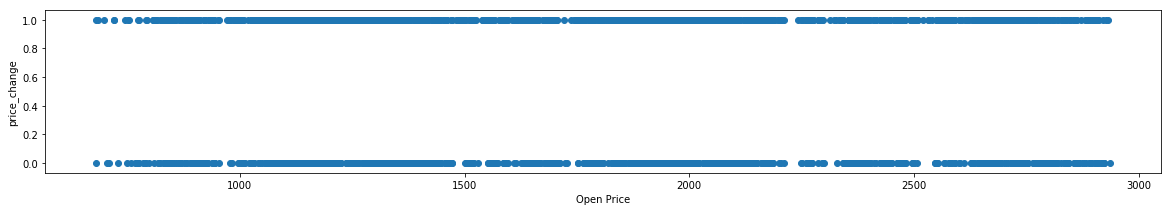

In [71]:
plot_feature(data,'Open Price')

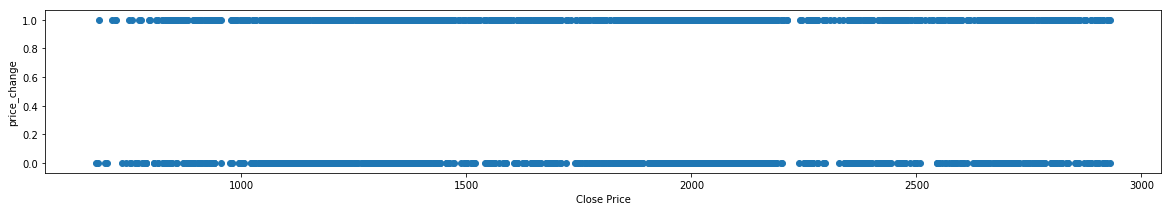

In [72]:
plot_feature(data,'Close Price')

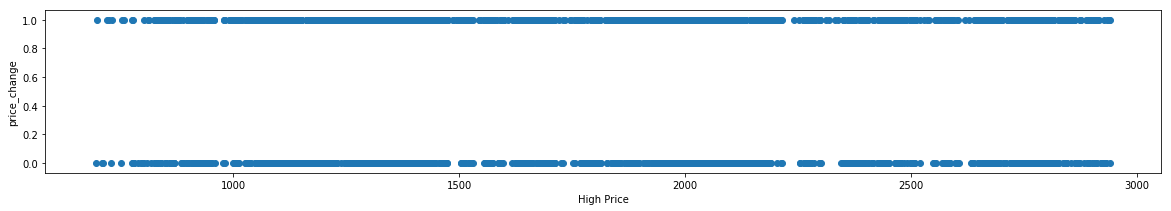

In [73]:
plot_feature(data,'High Price')

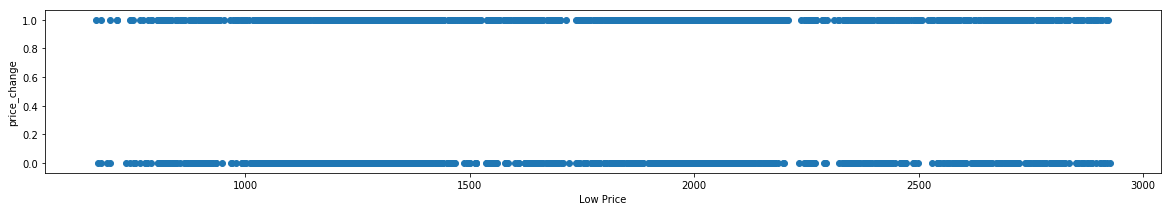

In [74]:
plot_feature(data,'Low Price')

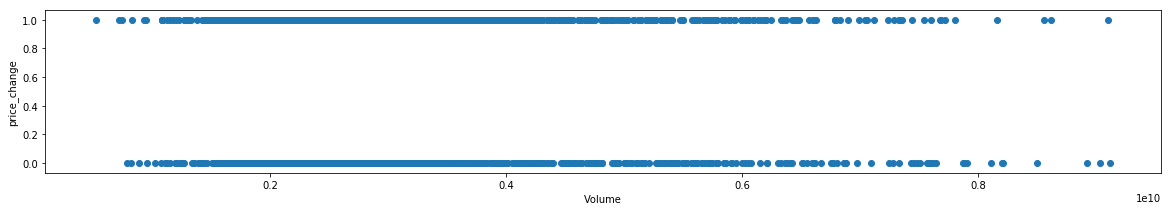

In [75]:
plot_feature(data,'Volume')

相較之下，volume對price_change而言有較不同的呈現

In [79]:
def evaluate(model, x_train, y_train, x_test, y_test):
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    train_acc = metrics.accuracy_score(y_train, train_preds)
    test_acc = metrics.accuracy_score(y_test, test_preds)
    print('Train accuracy: %s' % train_acc)
    print('Test accuracy: %s' % test_acc)

In [83]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
predictions=logmodel.predict(x_test)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


NameError: name 'logmodel' is not defined